# Chap 2: Linear regression

In [ ]:
"""## Import the required Modules"""

from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import seaborn as sb
import tensorflow as tf
from tensorflow import keras as ks
from tensorflow.estimator import LinearRegressor
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

print(tf.__version__)

2.3.0


In [ ]:
"""## Load and configure the Boston Housing Dataset"""

boston_load = datasets.load_boston()
feature_columns = boston_load.feature_names
target_column = boston_load.target

In [ ]:
boston_data = pd.DataFrame(boston_load.data, columns=feature_columns).astype(np.float32)
boston_data['MEDV'] = target_column.astype(np.float32)

boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.199997,4.0900,1.0,296.0,15.300000,396.899994,4.98,24.000000
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.900002,4.9671,2.0,242.0,17.799999,396.899994,9.14,21.600000
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.099998,4.9671,2.0,242.0,17.799999,392.829987,4.03,34.700001
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.799999,6.0622,3.0,222.0,18.700001,394.630005,2.94,33.400002
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.200001,6.0622,3.0,222.0,18.700001,396.899994,5.33,36.200001


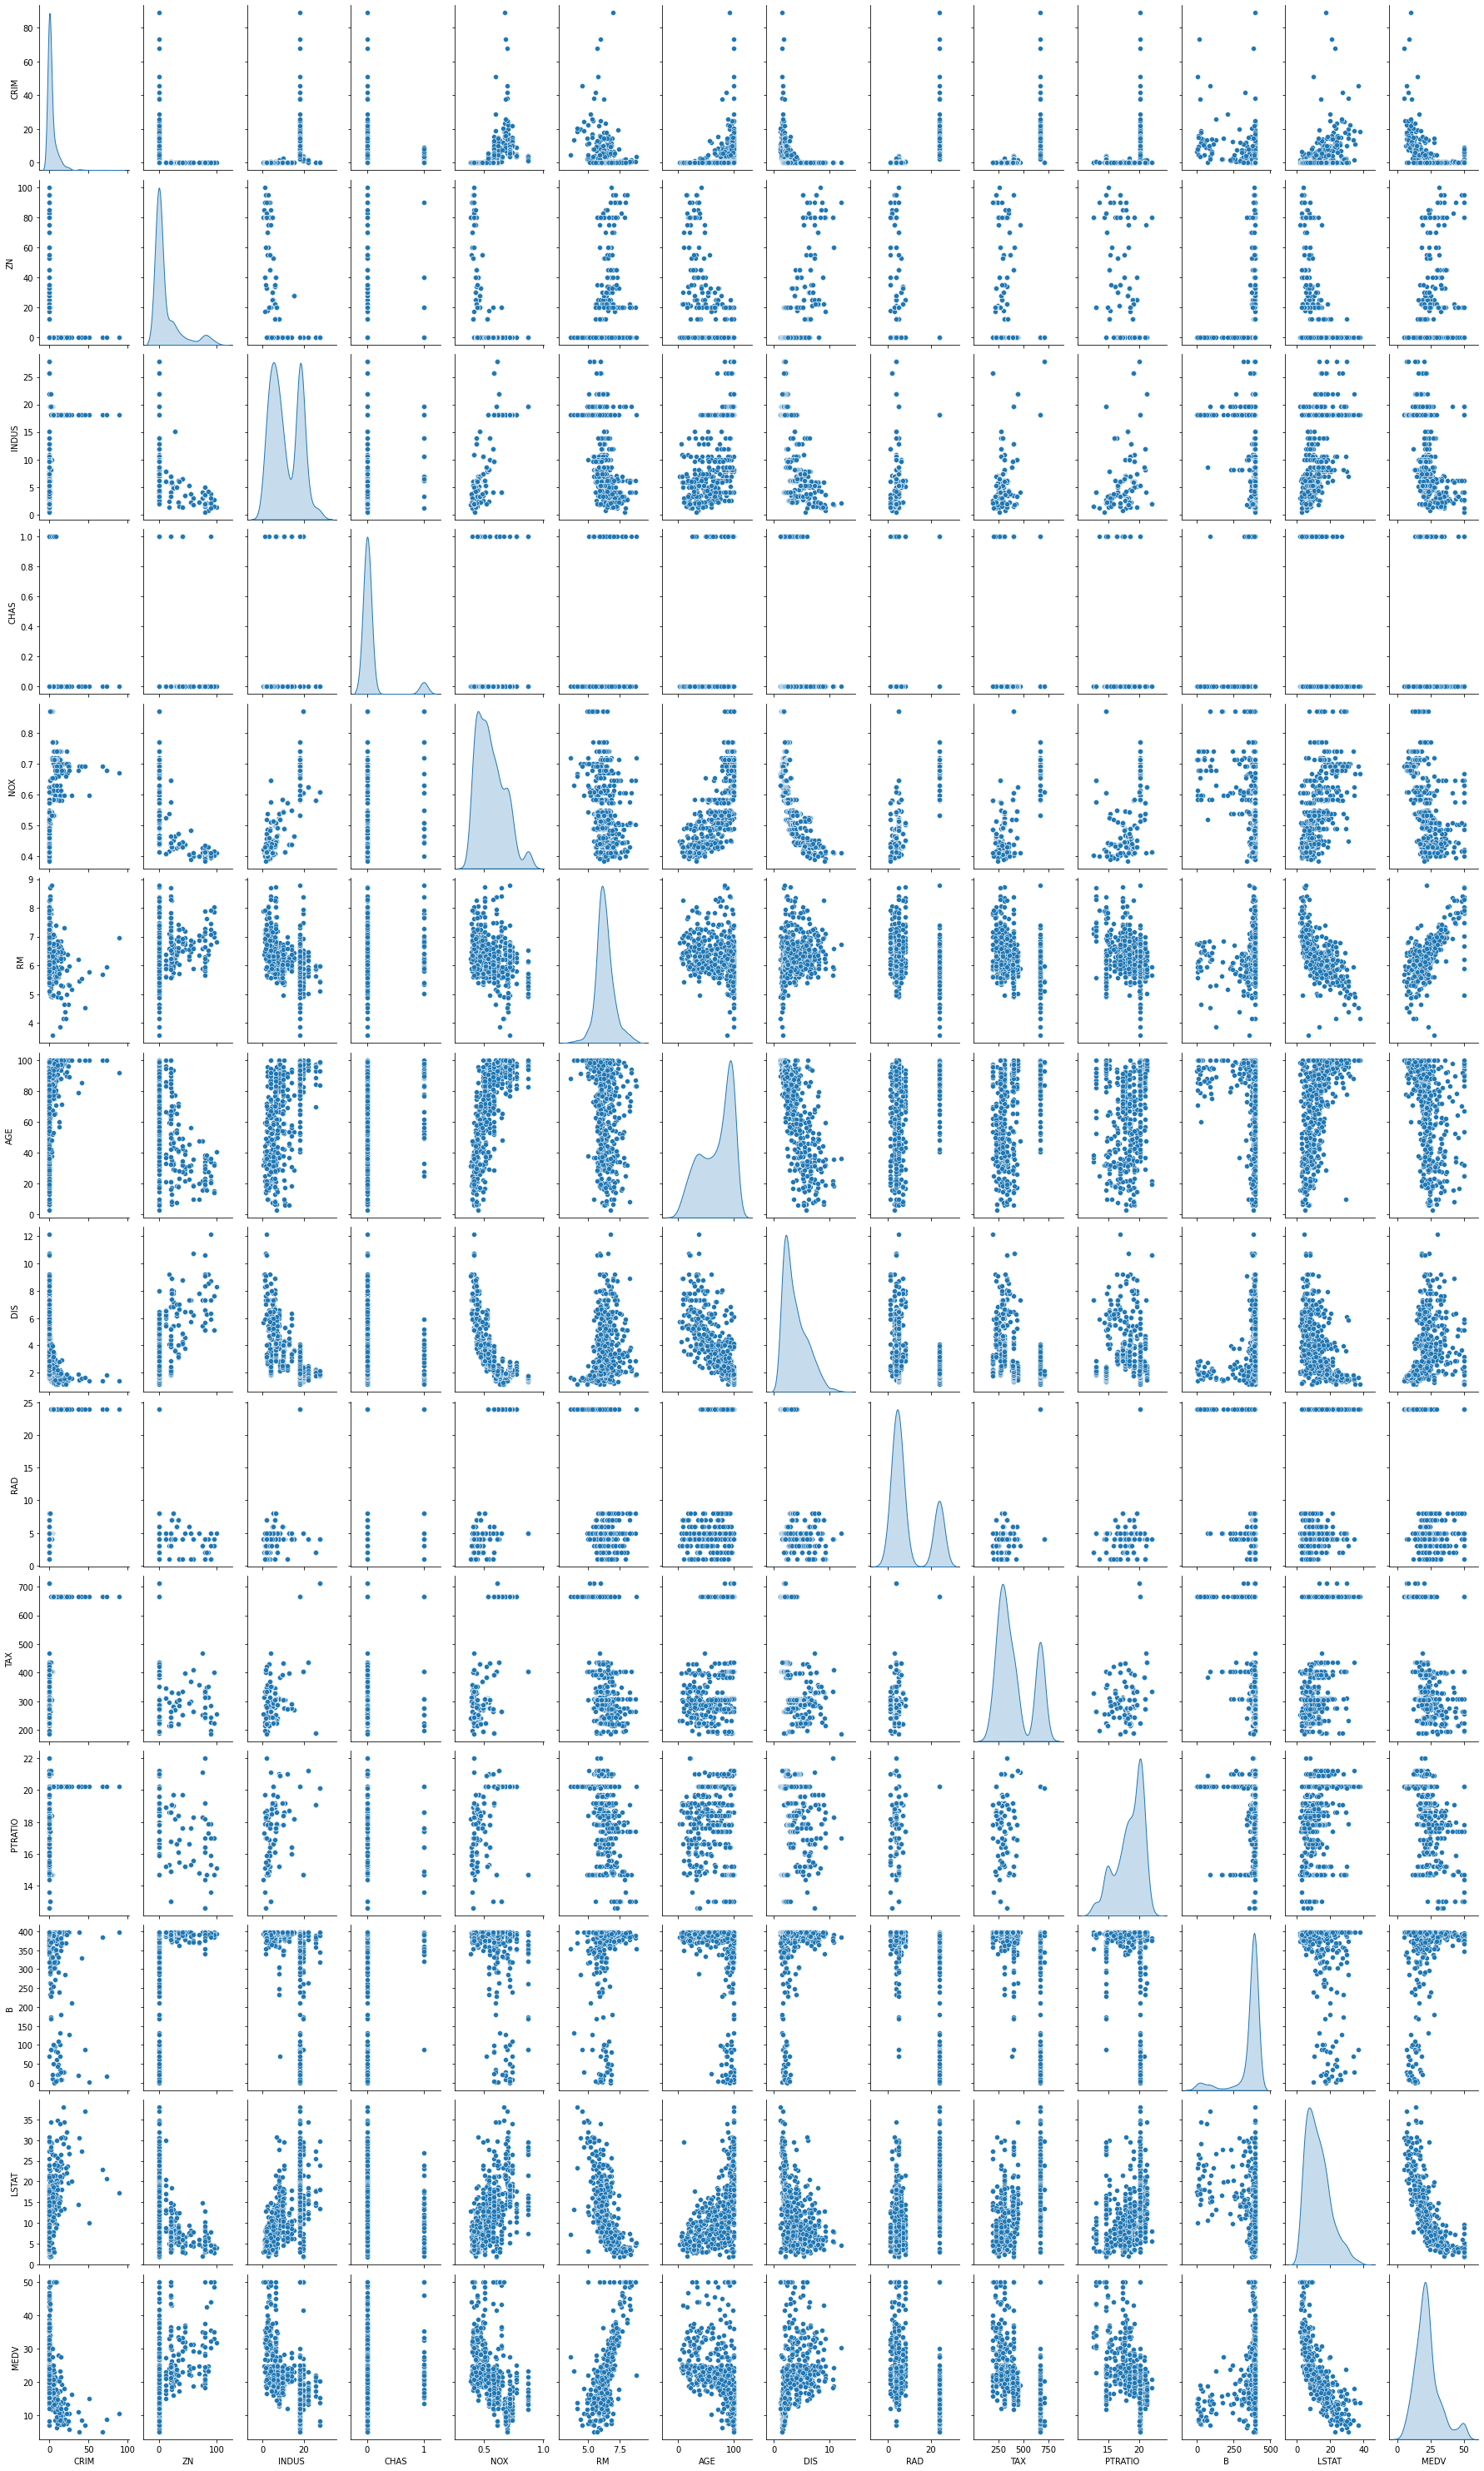

In [ ]:
"""## Checking the relation between the variables using Pairplot and Correlation Graph"""

sb.pairplot(boston_data, diag_kind="kde", height=3, aspect=0.6)

In [ ]:
correlation_data = boston_data.corr()
correlation_data.style.background_gradient(cmap='coolwarm', axis=None)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355502,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [ ]:
"""## Descriptive Statistics - Central Tendency and Dispersion"""

stats = boston_data.describe()
boston_stats = stats.transpose()
boston_stats

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613523,8.601545,0.00632,0.082045,0.256510,3.677083,88.976196
ZN,506.0,11.363636,23.322390,0.00000,0.000000,0.000000,12.500000,100.000000
INDUS,506.0,11.136797,6.860355,0.46000,5.190000,9.690000,18.100000,27.740000
CHAS,506.0,0.069170,0.253993,0.00000,0.000000,0.000000,0.000000,1.000000
NOX,506.0,0.554696,0.115878,0.38500,0.449000,0.538000,0.624000,0.871000
RM,506.0,6.284636,0.702617,3.56100,5.885500,6.208500,6.623500,8.780000
AGE,506.0,68.574921,28.148869,2.90000,45.025000,77.500000,94.074999,100.000000
DIS,506.0,3.795043,2.105711,1.12960,2.100175,3.207450,5.188425,12.126500
RAD,506.0,9.549407,8.707269,1.00000,4.000000,5.000000,24.000000,24.000000
TAX,506.0,408.237152,168.537170,187.00000,279.000000,330.000000,666.000000,711.000000


In [ ]:
"""## Select the required columns"""

X_data = boston_data[[i for i in boston_data.columns if i not in ['MEDV']]]
Y_data = boston_data[['MEDV']]

In [ ]:
"""## Train Test Split"""

training_features , test_features ,training_labels, test_labels = train_test_split(X_data , Y_data , test_size=0.2)

print('No. of rows in Training Features: ', training_features.shape[0])
print('No. of rows in Test Features: ', test_features.shape[0])
print('No. of columns in Training Features: ', training_features.shape[1])
print('No. of columns in Test Features: ', test_features.shape[1])

print('No. of rows in Training Label: ', training_labels.shape[0])
print('No. of rows in Test Label: ', test_labels.shape[0])
print('No. of columns in Training Label: ', training_labels.shape[1])
print('No. of columns in Test Label: ', test_labels.shape[1])

No. of rows in Training Features:  404
No. of rows in Test Features:  102
No. of columns in Training Features:  13
No. of columns in Test Features:  13
No. of rows in Training Label:  404
No. of rows in Test Label:  102
No. of columns in Training Label:  1
No. of columns in Test Label:  1


In [ ]:
stats = training_features.describe()
stats = stats.transpose()
stats

,count,mean,std,min,25%,50%,75%,max
CRIM,404.0,3.584953,8.703421,0.00632,0.079710,0.234405,3.202962,88.976196
ZN,404.0,11.582921,23.508165,0.00000,0.000000,0.000000,12.500000,100.000000
INDUS,404.0,11.202902,6.954944,0.74000,5.175000,9.690000,18.100000,27.740000
CHAS,404.0,0.061881,0.241239,0.00000,0.000000,0.000000,0.000000,1.000000
NOX,404.0,0.555730,0.117945,0.38500,0.448750,0.538000,0.625750,0.871000
RM,404.0,6.283584,0.686086,3.56100,5.887750,6.208500,6.618250,8.780000
AGE,404.0,68.408936,28.387747,2.90000,44.225001,77.500000,94.150000,100.000000
DIS,404.0,3.783589,2.104467,1.16910,2.097050,3.239250,5.118000,12.126500
RAD,404.0,9.341584,8.643601,1.00000,4.000000,5.000000,24.000000,24.000000
TAX,404.0,406.163361,168.224060,187.00000,277.000000,330.000000,666.000000,711.000000


In [ ]:
"""## Normalize Data"""

def norm(x):
  stats = x.describe()
  stats = stats.transpose()
  return (x - stats['mean']) / stats['std']

normed_train_features = norm(training_features)
normed_test_features = norm(test_features)

In [ ]:
normed_train_features

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
86,-0.405941,-0.492719,-0.965199,-0.256514,-0.904908,-0.391473,-0.821091,0.305831,-0.733674,-0.946139,0.027808,0.429725,0.031251
498,-0.384427,-0.492719,-0.217529,-0.256514,0.248168,-0.385642,-0.109517,-0.653129,-0.386596,-0.090138,0.352905,0.439758,0.039724
479,1.235003,-0.492719,0.991683,-0.256514,0.494045,-0.079558,0.690124,-0.870714,1.695869,1.544587,0.817328,0.290039,0.066554
80,-0.407176,0.570741,-0.911999,-0.256514,-1.099914,0.646299,-1.229718,0.768418,-0.617981,-0.744028,0.260020,0.439758,-1.037717
59,-0.400035,0.570741,-0.873178,-0.256514,-0.870994,-0.519736,-0.747116,1.496061,-0.155211,-0.726194,0.585117,0.439758,-0.482757
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,-0.394156,0.570741,-0.873178,-0.256514,-0.870994,-0.201992,-1.381192,1.915549,-0.155211,-0.726194,0.585117,0.371182,-0.816015
254,-0.406365,2.910354,-1.087414,-0.256514,-1.388183,-0.255921,-1.282558,2.583414,-0.965059,-0.541916,-0.947480,0.395548,-0.856967
22,-0.270294,-0.492719,-0.440392,-0.256514,-0.150321,-0.206364,0.820462,0.091857,-0.617981,-0.589472,1.188866,0.439758,0.858748
144,-0.092517,-0.492719,1.204481,-0.256514,2.673021,-2.012261,1.035343,-1.158340,-0.502289,-0.018804,-1.737000,0.439758,2.351349


In [ ]:
"""## Build the Input Pipeline for TensorFlow model"""

def feed_input(features_dataframe, target_dataframe, num_of_epochs=10, shuffle=True, batch_size=32):
  def input_feed_function():
    dataset = tf.data.Dataset.from_tensor_slices((dict(features_dataframe), target_dataframe))
    if shuffle:
      dataset = dataset.shuffle(2000)
    dataset = dataset.batch(batch_size).repeat(num_of_epochs)
    return dataset
  return input_feed_function

train_feed_input = feed_input(normed_train_features, training_labels)
train_feed_input_testing = feed_input(normed_train_features, training_labels, num_of_epochs=1, shuffle=False)
test_feed_input = feed_input(normed_test_features, test_labels, num_of_epochs=1, shuffle=False)

Explain feed_input

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices(
                         (dict(normed_train_features), training_labels))
dataset

<TensorSliceDataset shapes: ({CRIM: (), ZN: (), INDUS: (), CHAS: (), NOX: (), RM: (), AGE: (), DIS: (), RAD: (), TAX: (), PTRATIO: (), B: (), LSTAT: ()}, (1,)), types: ({CRIM: tf.float64, ZN: tf.float64, INDUS: tf.float64, CHAS: tf.float64, NOX: tf.float64, RM: tf.float64, AGE: tf.float64, DIS: tf.float64, RAD: tf.float64, TAX: tf.float64, PTRATIO: tf.float64, B: tf.float64, LSTAT: tf.float64}, tf.float32)>

In [ ]:
tf.data.experimental.cardinality(dataset) # length of dataset

<tf.Tensor: shape=(), dtype=int64, numpy=404>

In [ ]:
i=0
for element in dataset:
  print(element)
  i+=1
  if i==3: break

({'CRIM': <tf.Tensor: shape=(), dtype=float64, numpy=-0.4059406917213773>, 'ZN': <tf.Tensor: shape=(), dtype=float64, numpy=-0.4927190553157233>, 'INDUS': <tf.Tensor: shape=(), dtype=float64, numpy=-0.9651986270818002>, 'CHAS': <tf.Tensor: shape=(), dtype=float64, numpy=-0.2565142090461926>, 'NOX': <tf.Tensor: shape=(), dtype=float64, numpy=-0.9049081849280304>, 'RM': <tf.Tensor: shape=(), dtype=float64, numpy=-0.3914726311590144>, 'AGE': <tf.Tensor: shape=(), dtype=float64, numpy=-0.821091481053835>, 'DIS': <tf.Tensor: shape=(), dtype=float64, numpy=0.3058306119732292>, 'RAD': <tf.Tensor: shape=(), dtype=float64, numpy=-0.7336738356257033>, 'TAX': <tf.Tensor: shape=(), dtype=float64, numpy=-0.9461390988914742>, 'PTRATIO': <tf.Tensor: shape=(), dtype=float64, numpy=0.027808452266257538>, 'B': <tf.Tensor: shape=(), dtype=float64, numpy=0.42972508845430724>, 'LSTAT': <tf.Tensor: shape=(), dtype=float64, numpy=0.03125097004030722>}, <tf.Tensor: shape=(1,), dtype=float32, numpy=array([22.5

In [ ]:
shuffle=True 
dataset = dataset.shuffle(2000)

In [ ]:
i=0
for element in dataset:
  print(element)
  i+=1
  if i==3: break

({'CRIM': <tf.Tensor: shape=(), dtype=float64, numpy=-0.3956435911208589>, 'ZN': <tf.Tensor: shape=(), dtype=float64, numpy=-0.4927190553157233>, 'INDUS': <tf.Tensor: shape=(), dtype=float64, numpy=-0.6172446829997914>, 'CHAS': <tf.Tensor: shape=(), dtype=float64, numpy=-0.2565142090461926>, 'NOX': <tf.Tensor: shape=(), dtype=float64, numpy=-0.9133865808298779>, 'RM': <tf.Tensor: shape=(), dtype=float64, numpy=-0.16701046547671505>, 'AGE': <tf.Tensor: shape=(), dtype=float64, numpy=-2.1773103745761624>, 'DIS': <tf.Tensor: shape=(), dtype=float64, numpy=0.920570650095873>, 'RAD': <tf.Tensor: shape=(), dtype=float64, numpy=-0.7336738356257033>, 'TAX': <tf.Tensor: shape=(), dtype=float64, numpy=-1.0293614393529023>, 'PTRATIO': <tf.Tensor: shape=(), dtype=float64, numpy=-0.2508456507106301>, 'B': <tf.Tensor: shape=(), dtype=float64, numpy=0.29058972678419304>, 'LSTAT': <tf.Tensor: shape=(), dtype=float64, numpy=-0.964287029716884>}, <tf.Tensor: shape=(1,), dtype=float32, numpy=array([25.3]

In [ ]:
batch_size=32
num_of_epochs=10
dataset = dataset.batch(batch_size).repeat(num_of_epochs)
dataset

<RepeatDataset shapes: ({CRIM: (None,), ZN: (None,), INDUS: (None,), CHAS: (None,), NOX: (None,), RM: (None,), AGE: (None,), DIS: (None,), RAD: (None,), TAX: (None,), PTRATIO: (None,), B: (None,), LSTAT: (None,)}, (None, 1)), types: ({CRIM: tf.float64, ZN: tf.float64, INDUS: tf.float64, CHAS: tf.float64, NOX: tf.float64, RM: tf.float64, AGE: tf.float64, DIS: tf.float64, RAD: tf.float64, TAX: tf.float64, PTRATIO: tf.float64, B: tf.float64, LSTAT: tf.float64}, tf.float32)>

In [ ]:
len(dataset)
#training set: 404 rows × 13 columns
# batch size: 32 so need 13 batch per epoch, need 130 batch per 10 epochs

130

In [ ]:
i=0
for element in dataset:
  print(element)
  i+=1
  if i==2: break

({'CRIM': <tf.Tensor: shape=(32,), dtype=float64, numpy=
array([ 3.99461865, -0.40818234, -0.40876602, -0.40276723, -0.37141978,
       -0.39801852, -0.40840754, -0.40645428, -0.40993797, -0.40097253,
        1.96833498, -0.37977971, -0.39220586, -0.4052605 , -0.40541446,
       -0.40176073, -0.34781412, -0.39970866,  0.35273114, -0.25761281,
       -0.40779054, -0.15426032, -0.34979955, -0.40273506, -0.40433213,
       -0.39083284, -0.4044723 , -0.39359152, -0.35870869,  0.18576802,
       -0.40810306, -0.35213886])>, 'ZN': <tf.Tensor: shape=(32,), dtype=float64, numpy=
array([-0.49271906, -0.49271906, -0.49271906,  2.0595856 , -0.49271906,
       -0.49271906, -0.49271906, -0.49271906,  3.33573793, -0.49271906,
       -0.49271906, -0.49271906, -0.49271906, -0.49271906, -0.49271906,
       -0.49271906, -0.49271906,  0.78343327, -0.49271906, -0.49271906,
        0.35804916, -0.49271906,  0.35804916,  1.20881738, -0.49271906,
       -0.49271906,  2.48496971, -0.49271906, -0.49271906, -0.

End explain

In [ ]:
"""## Model Training"""

feature_columns_numeric = [tf.feature_column.numeric_column(m) \
                            for m in training_features.columns]
feature_columns_numeric

[NumericColumn(key='CRIM', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='ZN', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='INDUS', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='CHAS', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='NOX', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='RM', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='AGE', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='DIS', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='RAD', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='TAX', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='PTRATIO'

In [ ]:
linear_model = LinearRegressor(feature_columns=feature_columns_numeric, 
                               optimizer='RMSProp')
linear_model

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpc4jdt_w2', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [ ]:
linear_model.train(train_feed_input)

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpc4jdt_w2/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 734.28625, step = 0
INFO

In [ ]:
"""## Predictions"""

train_predictions = linear_model.predict(train_feed_input_testing)
test_predictions = linear_model.predict(test_feed_input)

In [ ]:
test_predictions

<generator object Estimator.predict at 0x7f19299f39e8>

In [ ]:
train_predictions_series = pd.Series([p['predictions'][0] for p in train_predictions])
test_predictions_series = pd.Series([p['predictions'][0] for p in test_predictions])
test_predictions_series

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpc4jdt_w2/model.ckpt-130
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all 

0      19.327047
1      26.196400
2      35.710346
3      29.453659
4      18.878721
         ...    
97     16.318489
98      4.321205
99     21.924559
100    13.895880
101    30.945917
Length: 102, dtype: float64

In [ ]:
train_predictions_df = pd.DataFrame(train_predictions_series, columns=['predictions'])
test_predictions_df = pd.DataFrame(test_predictions_series, columns=['predictions'])
test_predictions_df

,predictions
0,19.327047
1,26.196400
2,35.710346
3,29.453659
4,18.878721
...,...
97,16.318489
98,4.321205
99,21.924559
100,13.895880


In [ ]:
training_labels

,MEDV
86,22.500000
498,21.200001
479,21.400000
80,28.000000
59,19.600000
...,...
58,23.299999
254,21.900000
22,15.200000
144,11.800000


In [ ]:
training_labels.reset_index(drop=True, inplace=True)
train_predictions_df.reset_index(drop=True, inplace=True)
train_predictions_df

,predictions
0,20.278572
1,21.057447
2,23.151814
3,25.535629
4,18.358038
...,...
399,18.800795
400,20.214834
401,15.054377
402,10.890902


In [ ]:
test_labels.reset_index(drop=True, inplace=True)
test_predictions_df.reset_index(drop=True, inplace=True)

train_labels_with_predictions_df = pd.concat([training_labels, train_predictions_df], axis=1)
test_labels_with_predictions_df = pd.concat([test_labels, test_predictions_df], axis=1)
test_labels_with_predictions_df

,MEDV,predictions
0,26.600000,19.327047
1,22.000000,26.196400
2,50.000000,35.710346
3,34.900002,29.453659
4,24.500000,18.878721
...,...,...
97,17.500000,16.318489
98,13.800000,4.321205
99,21.200001,21.924559
100,8.300000,13.895880


In [ ]:
"""## Validation"""

def calculate_errors_and_r2(y_true, y_pred):
  mean_squared_err = (mean_squared_error(y_true, y_pred))
  root_mean_squared_err = np.sqrt(mean_squared_err)
  r2 = round(r2_score(y_true, y_pred)*100,0)
  return mean_squared_err, root_mean_squared_err, r2

train_mean_squared_error, train_root_mean_squared_error, train_r2_score_percentage = calculate_errors_and_r2(training_labels, train_predictions_series)
test_mean_squared_error, test_root_mean_squared_error, test_r2_score_percentage = 
calculate_errors_and_r2(test_labels, test_predictions_series)

print('Training Data Mean Squared Error = ', train_mean_squared_error)
print('Training Data Root Mean Squared Error = ', train_root_mean_squared_error)
print('Training Data R2 = ', train_r2_score_percentage)

print('Test Data Mean Squared Error = ', test_mean_squared_error)
print('Test Data Root Mean Squared Error = ', test_root_mean_squared_error)
print('Test Data R2 = ', test_r2_score_percentage)

Training Data Mean Squared Error =  25.72959065990288
Training Data Root Mean Squared Error =  5.07243439187762
Training Data R2 =  67.0
Test Data Mean Squared Error =  33.25135148609901
Test Data Root Mean Squared Error =  5.766398484851616
Test Data R2 =  68.0


# Logistic regresion

In [ ]:
# Use seaborn for pairplot
#!pip install seaborn

In [ ]:
try:
  %tensorflow_version 2.x
except Exception:
  pass

Import the required Modules

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

import pandas as pd
import seaborn as sb
import tensorflow as tf
from tensorflow import keras
from tensorflow.estimator import LinearClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

print(tf.__version__)

2.3.0


Load and configure the Iris Dataset

In [ ]:
col_names = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species']
target_dimensions = ['Setosa', 'Versicolor', 'Virginica']

training_data_path = tf.keras.utils.get_file("iris_training.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv")
test_data_path = tf.keras.utils.get_file("iris_test.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv")

training = pd.read_csv(training_data_path, names=col_names, header=0)
training = training[training['Species'] >= 1]
training['Species'] = training['Species'].replace([1,2], [0,1])
test = pd.read_csv(test_data_path, names=col_names, header=0)
test = test[test['Species'] >= 1]
test['Species'] = test['Species'].replace([1,2], [0,1])

training.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

iris_dataset = pd.concat([training, test], axis=0)
iris_dataset

8192/573 [============================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 0us/step


,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,6.4,2.8,5.6,2.2,1
1,5.0,2.3,3.3,1.0,0
2,4.9,2.5,4.5,1.7,1
3,6.9,3.1,5.1,2.3,1
4,6.7,3.1,4.4,1.4,0
...,...,...,...,...,...
17,5.8,2.7,3.9,1.2,0
18,6.1,3.0,4.6,1.4,0
19,6.7,3.1,4.7,1.5,0
20,6.7,3.3,5.7,2.5,1


In [ ]:
iris_dataset.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,6.262000,2.872000,4.906000,1.676000,0.500000
std,0.662834,0.332751,0.825578,0.424769,0.502519
min,4.900000,2.000000,3.000000,1.000000,0.000000
25%,5.800000,2.700000,4.375000,1.300000,0.000000
50%,6.300000,2.900000,4.900000,1.600000,0.500000
75%,6.700000,3.025000,5.525000,2.000000,1.000000
max,7.900000,3.800000,6.900000,2.500000,1.000000


Checking the relation between the variables using Pairplot and Correlation Graph

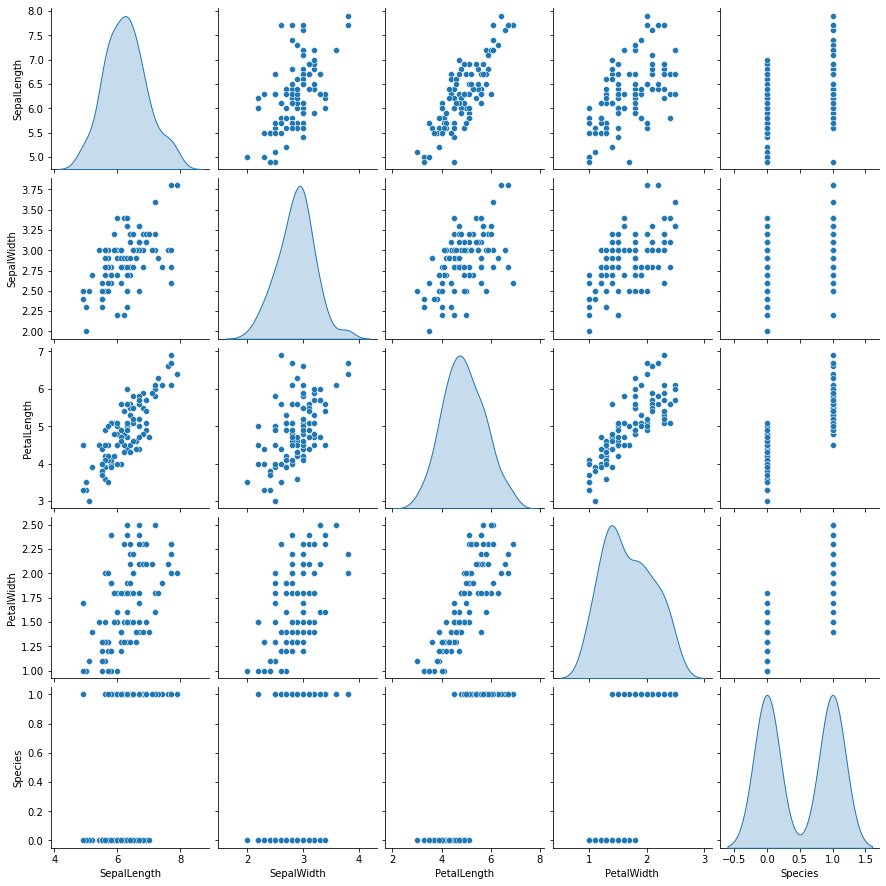

In [ ]:
sb.pairplot(iris_dataset, diag_kind="kde")

In [ ]:
correlation_data = iris_dataset.corr()
correlation_data.style.background_gradient(cmap='coolwarm', axis=None)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
SepalLength,1.000000,0.553855,0.828479,0.593709,0.494305
SepalWidth,0.553855,1.000000,0.519802,0.566203,0.308080
PetalLength,0.828479,0.519802,1.000000,0.823348,0.786424
PetalWidth,0.593709,0.566203,0.823348,1.000000,0.828129
Species,0.494305,0.308080,0.786424,0.828129,1.000000


Descriptive Statistics - Central Tendency and Dispersion

In [ ]:
stats = iris_dataset.describe()
iris_stats = stats.transpose()
iris_stats

,count,mean,std,min,25%,50%,75%,max
SepalLength,100.0,6.262,0.662834,4.9,5.800,6.3,6.700,7.9
SepalWidth,100.0,2.872,0.332751,2.0,2.700,2.9,3.025,3.8
PetalLength,100.0,4.906,0.825578,3.0,4.375,4.9,5.525,6.9
PetalWidth,100.0,1.676,0.424769,1.0,1.300,1.6,2.000,2.5
Species,100.0,0.500,0.502519,0.0,0.000,0.5,1.000,1.0


Select the required columns

In [ ]:
X_data = iris_dataset[[m for m in iris_dataset.columns if m not in ['Species']]]
Y_data = iris_dataset[['Species']]

Train Test Split

In [ ]:
training_features , test_features ,training_labels, test_labels = train_test_split(X_data , Y_data , test_size=0.2)

In [ ]:
print('No. of rows in Training Features: ', training_features.shape[0])
print('No. of rows in Test Features: ', test_features.shape[0])
print('No. of columns in Training Features: ', training_features.shape[1])
print('No. of columns in Test Features: ', test_features.shape[1])

print('No. of rows in Training Label: ', training_labels.shape[0])
print('No. of rows in Test Label: ', test_labels.shape[0])
print('No. of columns in Training Label: ', training_labels.shape[1])
print('No. of columns in Test Label: ', test_labels.shape[1])

No. of rows in Training Features:  80
No. of rows in Test Features:  20
No. of columns in Training Features:  4
No. of columns in Test Features:  4
No. of rows in Training Label:  80
No. of rows in Test Label:  20
No. of columns in Training Label:  1
No. of columns in Test Label:  1


In [ ]:
stats = training_features.describe()
stats = stats.transpose()
stats

,count,mean,std,min,25%,50%,75%,max
SepalLength,80.0,6.22500,0.687225,4.9,5.70,6.15,6.700,7.9
SepalWidth,80.0,2.87125,0.338348,2.0,2.70,2.90,3.025,3.8
PetalLength,80.0,4.87875,0.844445,3.0,4.35,4.80,5.500,6.9
PetalWidth,80.0,1.65375,0.420351,1.0,1.30,1.50,2.000,2.5


In [ ]:
stats = test_features.describe()
stats = stats.transpose()
stats

,count,mean,std,min,25%,50%,75%,max
SepalLength,20.0,6.410,0.544736,5.5,6.15,6.30,6.700,7.7
SepalWidth,20.0,2.875,0.317681,2.2,2.70,2.90,3.025,3.4
PetalLength,20.0,5.015,0.755524,3.6,4.45,5.05,5.600,6.3
PetalWidth,20.0,1.765,0.441618,1.0,1.45,1.80,2.125,2.5


Normalize Data

In [ ]:
def norm(x):
  stats = x.describe()
  stats = stats.transpose()
  return (x - stats['mean']) / stats['std']

normed_train_features = norm(training_features)
normed_test_features = norm(test_features)

Build the Input Pipeline for TensorFlow model

In [ ]:
def feed_input(features_dataframe, target_dataframe, num_of_epochs=10, shuffle=True, batch_size=32):
  def input_feed_function():
    dataset = tf.data.Dataset.from_tensor_slices((dict(features_dataframe), target_dataframe))
    if shuffle:
      dataset = dataset.shuffle(2000)
    dataset = dataset.batch(batch_size).repeat(num_of_epochs)
    return dataset
  return input_feed_function

train_feed_input = feed_input(normed_train_features, training_labels)
train_feed_input_testing = feed_input(normed_train_features, training_labels, num_of_epochs=1, shuffle=False)
test_feed_input = feed_input(normed_test_features, test_labels, num_of_epochs=1, shuffle=False)

Model Training

In [ ]:
feature_columns_numeric = [tf.feature_column.numeric_column(m) for m in training_features.columns]
feature_columns_numeric

[NumericColumn(key='SepalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='SepalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='PetalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='PetalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]

In [ ]:
logistic_model = LinearClassifier(feature_columns=feature_columns_numeric)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp9h7lcs29', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [ ]:
logistic_model.train(train_feed_input)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorf

Predictions

In [ ]:
train_predictions = logistic_model.predict(train_feed_input_testing)
test_predictions = logistic_model.predict(test_feed_input)

In [ ]:
train_predictions_series = pd.Series([p['classes'][0].decode("utf-8")   for p in train_predictions])
test_predictions_series = pd.Series([p['classes'][0].decode("utf-8")   for p in test_predictions])
test_predictions_series

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp9h7lcs29/model.ckpt-30
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all l

0     1
1     1
2     0
3     1
4     0
5     1
6     0
7     1
8     0
9     0
10    0
11    1
12    1
13    1
14    1
15    0
16    0
17    0
18    1
19    0
dtype: object

In [ ]:
train_predictions_df = pd.DataFrame(train_predictions_series, columns=['predictions'])
test_predictions_df = pd.DataFrame(test_predictions_series, columns=['predictions'])

In [ ]:
training_labels.reset_index(drop=True, inplace=True)
train_predictions_df.reset_index(drop=True, inplace=True)

test_labels.reset_index(drop=True, inplace=True)
test_predictions_df.reset_index(drop=True, inplace=True)

In [ ]:
train_labels_with_predictions_df = pd.concat([training_labels, train_predictions_df], axis=1)
test_labels_with_predictions_df = pd.concat([test_labels, test_predictions_df], axis=1)

Validation

In [ ]:
def calculate_binary_class_scores(y_true, y_pred):
  accuracy = accuracy_score(y_true, y_pred.astype('int64'))
  precision = precision_score(y_true, y_pred.astype('int64'))
  recall = recall_score(y_true, y_pred.astype('int64'))
  return accuracy, precision, recall



In [ ]:
train_accuracy_score, train_precision_score, train_recall_score = calculate_binary_class_scores(training_labels, train_predictions_series)
test_accuracy_score, test_precision_score, test_recall_score = calculate_binary_class_scores(test_labels, test_predictions_series)

print('Training Data Accuracy (%) = ', round(train_accuracy_score*100,2))
print('Training Data Precision (%) = ', round(train_precision_score*100,2))
print('Training Data Recall (%) = ', round(train_recall_score*100,2))
print('-'*50)
print('Test Data Accuracy (%) = ', round(test_accuracy_score*100,2))
print('Test Data Precision (%) = ', round(test_precision_score*100,2))
print('Test Data Recall (%) = ', round(test_recall_score*100,2))


Training Data Accuracy (%) =  97.5
Training Data Precision (%) =  100.0
Training Data Recall (%) =  94.74
--------------------------------------------------
Test Data Accuracy (%) =  90.0
Test Data Precision (%) =  100.0
Test Data Recall (%) =  83.33


# Boosted Trees with TensorFlow 2.0

In [ ]:
"""## Import the required Modules"""

from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import seaborn as sb
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
print(tf.__version__)

2.3.0


In [ ]:
"""## Load and configure the Iris Dataset"""

CSV_COLUMN_NAMES = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species']
SPECIES = ['Setosa', 'Versicolor', 'Virginica']

train_path = tf.keras.utils.get_file("iris_training.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv")
test_path = tf.keras.utils.get_file("iris_test.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv")

train = pd.read_csv(train_path, names=CSV_COLUMN_NAMES, header=0)
train = train[train.Species >= 1]
train['Species'] = train['Species'].replace([1,2], [0,1])
test = pd.read_csv(test_path, names=CSV_COLUMN_NAMES, header=0)
test = test[test.Species >= 1]
test['Species'] = test['Species'].replace([1,2], [0,1])

train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

iris_dataset = pd.concat([train, test], axis=0)
iris_dataset

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,6.4,2.8,5.6,2.2,1
1,5.0,2.3,3.3,1.0,0
2,4.9,2.5,4.5,1.7,1
3,6.9,3.1,5.1,2.3,1
4,6.7,3.1,4.4,1.4,0
...,...,...,...,...,...
17,5.8,2.7,3.9,1.2,0
18,6.1,3.0,4.6,1.4,0
19,6.7,3.1,4.7,1.5,0
20,6.7,3.3,5.7,2.5,1


In [ ]:
iris_dataset.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,6.262000,2.872000,4.906000,1.676000,0.500000
std,0.662834,0.332751,0.825578,0.424769,0.502519
min,4.900000,2.000000,3.000000,1.000000,0.000000
25%,5.800000,2.700000,4.375000,1.300000,0.000000
50%,6.300000,2.900000,4.900000,1.600000,0.500000
75%,6.700000,3.025000,5.525000,2.000000,1.000000
max,7.900000,3.800000,6.900000,2.500000,1.000000


In [ ]:
"""## Select the required columns"""

X_data = iris_dataset[[i for i in iris_dataset.columns if i not in ['Species']]]
Y_data = iris_dataset[['Species']]

In [ ]:
"""## Train Test Split"""

train_features , test_features ,train_labels, test_labels = train_test_split(X_data , Y_data , test_size=0.3)

print('Training Features Rows: ', train_features.shape[0])
print('Test Features Rows: ', test_features.shape[0])
print('Training Features Columns: ', train_features.shape[1])
print('Test Features Columns: ', test_features.shape[1])

print('Training Label Rows: ', train_labels.shape[0])
print('Test Label Rows: ', test_labels.shape[0])
print('Training Label Columns: ', train_labels.shape[1])
print('Test Label Columns: ', test_labels.shape[1])

Training Features Rows:  70
Test Features Rows:  30
Training Features Columns:  4
Test Features Columns:  4
Training Label Rows:  70
Test Label Rows:  30
Training Label Columns:  1
Test Label Columns:  1


In [ ]:
"""## Normalize Data"""

def norm(x):
  stats = x.describe()
  stats = stats.transpose()
  return (x - stats['mean']) / stats['std']

normed_train_features = norm(train_features)
normed_test_features = norm(test_features)

In [ ]:
"""## Build the Input Pipeline for TensorFlow model"""

def feed_input(features_df, target_df, num_of_epochs=10, shuffle=True, batch_size=35):
  def input_feed_function():
    dataset = tf.data.Dataset.from_tensor_slices((dict(features_df), target_df))
    if shuffle:
      dataset = dataset.shuffle(1000)
    dataset = dataset.batch(batch_size).repeat(num_of_epochs)
    return dataset
  return input_feed_function

train_feed_input = feed_input(normed_train_features, train_labels)
train_feed_input_testing = feed_input(normed_train_features, train_labels, num_of_epochs=1, shuffle=False)
test_feed_input = feed_input(normed_test_features, test_labels, num_of_epochs=1, shuffle=False)

In [ ]:
"""## Model Training"""

feature_columns_numeric = [tf.feature_column.numeric_column(k) for k in train_features.columns]

rf_model = tf.estimator.BoostedTreesClassifier(feature_columns=feature_columns_numeric,
                                               n_batches_per_layer=1)
rf_model

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmphv97latu', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [ ]:
rf_model.train(train_feed_input)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'_Resource' object has no attribute 'name'
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'_Resource' object has no attribute 'name'
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmphv97latu/model.ckpt.
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'_Resource' object has no attribute 'name'
INFO:tensorflow:Calling checkpoint listeners after saving checkp

In [ ]:
"""## Predictions"""

train_predictions = rf_model.predict(train_feed_input_testing)
test_predictions = rf_model.predict(test_feed_input)

train_predictions_series = pd.Series([p['classes'][0].decode("utf-8")   for p in train_predictions])
test_predictions_series = pd.Series([p['classes'][0].decode("utf-8")   for p in test_predictions])

train_predictions_df = pd.DataFrame(train_predictions_series, columns=['predictions'])
test_predictions_df = pd.DataFrame(test_predictions_series, columns=['predictions'])

train_labels.reset_index(drop=True, inplace=True)
train_predictions_df.reset_index(drop=True, inplace=True)

test_labels.reset_index(drop=True, inplace=True)
test_predictions_df.reset_index(drop=True, inplace=True)

train_labels_with_predictions_df = pd.concat([train_labels, train_predictions_df], axis=1)
test_labels_with_predictions_df = pd.concat([test_labels, test_predictions_df], axis=1)


INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmphv97latu/model.ckpt-19
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmphv97latu/model.ckpt-19
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [ ]:
"""## Validation"""

def calculate_binary_class_scores(y_true, y_pred):
  acc_score = accuracy_score(y_true, y_pred.astype('int64'))
  prec_score = precision_score(y_true, y_pred.astype('int64'))
  rec_score = recall_score(y_true, y_pred.astype('int64'))
  return acc_score, prec_score, rec_score

train_accuracy_score, train_precision_score, train_recall_score = calculate_binary_class_scores(train_labels, train_predictions_series)
test_accuracy_score, test_precision_score, test_recall_score = calculate_binary_class_scores(test_labels, test_predictions_series)

print('Training Data Accuracy (%) = ', round(train_accuracy_score*100,2))
print('Training Data Precision (%) = ', round(train_precision_score*100,2))
print('Training Data Recall (%) = ', round(train_recall_score*100,2))
print('-'*50)
print('Test Data Accuracy (%) = ', round(test_accuracy_score*100,2))
print('Test Data Precision (%) = ', round(test_precision_score*100,2))
print('Test Data Recall (%) = ', round(test_recall_score*100,2))


Training Data Accuracy (%) =  98.57
Training Data Precision (%) =  97.5
Training Data Recall (%) =  100.0
--------------------------------------------------
Test Data Accuracy (%) =  83.33
Test Data Precision (%) =  68.75
Test Data Recall (%) =  100.0


# Fashion MNIST Neural Network tf.keras

## Basic Neural Network Implementation in TensorFlow 2.0

**About the dataset**



Let us implement a simple neural network using TensorFlow 2.0. For this, we will make use of the Fashion MNIST dataset by Zalando (MIT License) which contains 70,000 images (in grayscale) in 10 different categories. The images are 28x28 pixels of individual articles of clothing with values ranging from 0 to 255 as shown below:

![Fashion MNIST dataset](https://raw.githubusercontent.com/zalandoresearch/fashion-mnist/master/doc/img/fashion-mnist-sprite.png)

Out of the total 70,000 images, 60,000 are used for training and remaining 10,000 for testing. The labels are integer arrays ranging from 0 to 9. The class names are not a part of the dataset and hence we need to include the below mapping while training/prediction:

Label	-> Description

0	-> T-shirt/top

1	-> Trouser

2	-> Pullover

3	-> Dress

4	-> Coat

5	-> Sandal

6	-> Shirt

7	-> Sneaker

8	-> Bag

9	-> Ankle boot


In [ ]:
# Create class_names list object for mapping labels to names

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
# Use the below code to make sure that you select TensorFlow 2.0 in Colab
try:
  %tensorflow_version 2.x
except Exception:
  pass

In [ ]:
# Install necessary modules

from __future__ import absolute_import, division, print_function, unicode_literals

# Helper libraries
import numpy as np

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras as ks

# Validating the TensorFlow version
print(tf.__version__)

2.3.0


In [ ]:
# Load the Fashion MNIST dataset

(training_images, training_labels), (test_images, test_labels) = ks.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


**Data Exploration**

In [ ]:
# Shape of Training and Test Set

print('Training Images Dataset Shape: {}'.format(training_images.shape))
print('No. of Training Images Dataset Labels: {}'.format(len(training_labels)))
print('Test Images Dataset Shape: {}'.format(test_images.shape))
print('No. of Test Images Dataset Labels: {}'.format(len(test_labels)))

Training Images Dataset Shape: (60000, 28, 28)
No. of Training Images Dataset Labels: 60000
Test Images Dataset Shape: (10000, 28, 28)
No. of Test Images Dataset Labels: 10000


**Data Preprocessing**

As the pixel values range from 0 to 255, we have to scale these values to a range of 0 to 1 before feeding them to the model. We can scale these values (both for training and test datasets) by dividing the values by 255:

In [ ]:
training_images = training_images / 255.0

test_images = test_images / 255.0

**Model Building**

We will be using the keras implementation to build the different layers of a NN. We will keep it simple by having only 1 hidden layer. 

In [ ]:
input_data_shape = (28, 28)
hidden_activation_function = 'relu'
output_activation_function = 'softmax'

nn_model = ks.Sequential()
nn_model.add(ks.layers.Flatten(input_shape=input_data_shape, name='Input_layer'))
nn_model.add(ks.layers.Dense(32, activation=hidden_activation_function, name='Hidden_layer'))
nn_model.add(ks.layers.Dense(10, activation=output_activation_function, name='Output_layer'))

In [ ]:
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_layer (Flatten)        (None, 784)               0         
_________________________________________________________________
Hidden_layer (Dense)         (None, 32)                25120     
_________________________________________________________________
Output_layer (Dense)         (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


Now, we will use an optimization function with the help of compile method. An Adam optimizer with objective function as sparse_categorical_crossentropy which optimzes for the accuracy metric can be built as follows:

In [ ]:
optimizer = 'adam'
loss_function = 'sparse_categorical_crossentropy'
metric = ['accuracy']
nn_model.compile(optimizer=optimizer, loss=loss_function, metrics=metric)

In [ ]:
nn_model.fit(training_images, training_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5454 - accuracy: 0.8102
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4061 - accuracy: 0.8549
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3680 - accuracy: 0.8676
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3468 - accuracy: 0.8742
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3286 - accuracy: 0.8808
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3169 - accuracy: 0.8853
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3093 - accuracy: 0.8877
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2989 - accuracy: 0.8914
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2930 - accuracy: 0.8934
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.284

**Model Evaluation**

1. Training Evaluation

In [ ]:
training_loss, training_accuracy = nn_model.evaluate(training_images, training_labels)

print('Training Data Accuracy {}'.format(round(float(training_accuracy),2)))

1875/1875 [==============================] - 2s 853us/step - loss: 0.2734 - accuracy: 0.9015
Training Data Accuracy 0.9


2. Test Evaluation

In [ ]:
test_loss, test_accuracy = nn_model.evaluate(test_images, test_labels)

print('Test Data Accuracy {}'.format(round(float(test_accuracy),2)))

313/313 [==============================] - 0s 1ms/step - loss: 0.3628 - accuracy: 0.8707
Test Data Accuracy 0.87


Deep neural network with tf.keras

In [ ]:
input_data_shape = (28, 28)
hidden_activation_function = 'relu'
output_activation_function = 'softmax'

dnn_model = ks.Sequential()
dnn_model.add(ks.layers.Flatten(input_shape=input_data_shape, name='Input_layer'))
dnn_model.add(ks.layers.Dense(256, activation=hidden_activation_function, name='Hidden_layer_1'))
dnn_model.add(ks.layers.Dense(192, activation=hidden_activation_function, name='Hidden_layer_2'))
dnn_model.add(ks.layers.Dense(128, activation=hidden_activation_function, name='Hidden_layer_3'))
dnn_model.add(ks.layers.Dense(10, activation=output_activation_function, name='Output_layer'))

In [ ]:
dnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_layer (Flatten)        (None, 784)               0         
_________________________________________________________________
Hidden_layer_1 (Dense)       (None, 256)               200960    
_________________________________________________________________
Hidden_layer_2 (Dense)       (None, 192)               49344     
_________________________________________________________________
Hidden_layer_3 (Dense)       (None, 128)               24704     
_________________________________________________________________
Output_layer (Dense)         (None, 10)                1290      
Total params: 276,298
Trainable params: 276,298
Non-trainable params: 0
_________________________________________________________________


In [ ]:
optimizer = 'adam'
loss_function = 'sparse_categorical_crossentropy'
metric = ['accuracy']
dnn_model.compile(optimizer=optimizer, loss=loss_function, metrics=metric)

In [ ]:
dnn_model.fit(training_images, training_labels, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4756 - accuracy: 0.8264
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3618 - accuracy: 0.8666
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3269 - accuracy: 0.8791
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3074 - accuracy: 0.8854
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2869 - accuracy: 0.8929
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2714 - accuracy: 0.8984
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2612 - accuracy: 0.9010
Epoch 8/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2481 - accuracy: 0.9060
Epoch 9/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2397 - accuracy: 0.9087
Epoch 10/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.229

In [ ]:
training_loss, training_accuracy = dnn_model.evaluate(training_images, training_labels)

print('Training Data Accuracy {}'.format(round(float(training_accuracy),2)))

1875/1875 [==============================] - 2s 1ms/step - loss: 0.1721 - accuracy: 0.9369
Training Data Accuracy 0.94


In [ ]:
test_loss, test_accuracy = dnn_model.evaluate(test_images, test_labels)

print('Test Data Accuracy {}'.format(round(float(test_accuracy),2)))

313/313 [==============================] - 1s 2ms/step - loss: 0.4226 - accuracy: 0.8890
Test Data Accuracy 0.89


## Estimator with Keras model

In [2]:
try:
  %tensorflow_version 2.x
except Exception:
  pass

Import the required Modules

In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras as ks
import tensorflow_datasets as tf_ds

print(tf.__version__)

2.3.0


In [4]:
def data_input():
  train_test_split = tf_ds.Split.TRAIN
  iris_dataset = tf_ds.load('iris', split=train_test_split, as_supervised=True)
  iris_dataset = iris_dataset.map(lambda features, labels: ({'dense_input':features}, labels))
  iris_dataset = iris_dataset.batch(32).repeat()
  return iris_dataset

In [5]:
data_input

<function __main__.data_input>

In [6]:
activation_function = 'relu'
input_shape = (4,)
dropout = 0.2
output_activation_function = 'sigmoid'

keras_model = ks.models.Sequential([ks.layers.Dense(16, activation=activation_function, input_shape=input_shape), ks.layers.Dropout(dropout), ks.layers.Dense(1, activation=output_activation_function)])

In [7]:
loss_function = 'categorical_crossentropy'
optimizer = 'adam'

keras_model.compile(loss=loss_function, optimizer=optimizer)
keras_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                80        
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


In [8]:
model_path = "/keras_estimator/"
estimator_keras_model = ks.estimator.model_to_estimator(keras_model=keras_model, model_dir=model_path)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using the Keras model provided.
Instructions for updating:
Simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
INFO:tensorflow:Using config: {'_model_dir': '/keras_estimator/', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_i

In [9]:
estimator_keras_model.train(input_fn=data_input, steps=25)
evaluation_result = estimator_keras_model.evaluate(input_fn=data_input, steps=10)
print('Final evaluation result: {}'.format(evaluation_result))

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Shuffling and writing examples to /root/tensorflow_datasets/iris/2.0.0.incompleteJJYNE9/iris-train.tfrecord


Dataset iris downloaded and prepared to /root/tensorflow_datasets/iris/2.0.0. Subsequent calls will reuse this data.
INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Warm-starting with WarmStartSettings: WarmStartSettings(ckpt_to_initialize_from='/keras_estimator/keras/keras_model.ckpt', vars_to_warm_start='.*', var_name_to_vocab_info={}, var_name_to_prev_var_name={})


INFO:tensorflow:Warm-starting with WarmStartSettings: WarmStartSettings(ckpt_to_initialize_from='/keras_estimator/keras/keras_model.ckpt', vars_to_warm_start='.*', var_name_to_vocab_info={}, var_name_to_prev_var_name={})


INFO:tensorflow:Warm-starting from: /keras_estimator/keras/keras_model.ckpt


INFO:tensorflow:Warm-starting from: /keras_estimator/keras/keras_model.ckpt


INFO:tensorflow:Warm-starting variables only in TRAINABLE_VARIABLES.


INFO:tensorflow:Warm-starting variables only in TRAINABLE_VARIABLES.


INFO:tensorflow:Warm-started 4 variables.


INFO:tensorflow:Warm-started 4 variables.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...


INFO:tensorflow:Saving checkpoints for 0 into /keras_estimator/model.ckpt.


INFO:tensorflow:Saving checkpoints for 0 into /keras_estimator/model.ckpt.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...


INFO:tensorflow:loss = 114.55898, step = 0


INFO:tensorflow:loss = 114.55898, step = 0


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 25...


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 25...


INFO:tensorflow:Saving checkpoints for 25 into /keras_estimator/model.ckpt.


INFO:tensorflow:Saving checkpoints for 25 into /keras_estimator/model.ckpt.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 25...


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 25...


INFO:tensorflow:Loss for final step: 76.01956.


INFO:tensorflow:Loss for final step: 76.01956.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Starting evaluation at 2020-10-17T04:55:51Z


INFO:tensorflow:Starting evaluation at 2020-10-17T04:55:51Z


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from /keras_estimator/model.ckpt-25


INFO:tensorflow:Restoring parameters from /keras_estimator/model.ckpt-25


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Evaluation [1/10]


INFO:tensorflow:Evaluation [1/10]


INFO:tensorflow:Evaluation [2/10]


INFO:tensorflow:Evaluation [2/10]


INFO:tensorflow:Evaluation [3/10]


INFO:tensorflow:Evaluation [3/10]


INFO:tensorflow:Evaluation [4/10]


INFO:tensorflow:Evaluation [4/10]


INFO:tensorflow:Evaluation [5/10]


INFO:tensorflow:Evaluation [5/10]


INFO:tensorflow:Evaluation [6/10]


INFO:tensorflow:Evaluation [6/10]


INFO:tensorflow:Evaluation [7/10]


INFO:tensorflow:Evaluation [7/10]


INFO:tensorflow:Evaluation [8/10]


INFO:tensorflow:Evaluation [8/10]


INFO:tensorflow:Evaluation [9/10]


INFO:tensorflow:Evaluation [9/10]


INFO:tensorflow:Evaluation [10/10]


INFO:tensorflow:Evaluation [10/10]


INFO:tensorflow:Inference Time : 0.22437s


INFO:tensorflow:Inference Time : 0.22437s


INFO:tensorflow:Finished evaluation at 2020-10-17-04:55:52


INFO:tensorflow:Finished evaluation at 2020-10-17-04:55:52


INFO:tensorflow:Saving dict for global step 25: global_step = 25, loss = 102.59116


INFO:tensorflow:Saving dict for global step 25: global_step = 25, loss = 102.59116


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 25: /keras_estimator/model.ckpt-25


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 25: /keras_estimator/model.ckpt-25


Fianl evaluation result: {'loss': 102.59116, 'global_step': 25}
